In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path


In [2]:
datapath = Path(Path().cwd().parents[2]) / 'data'
tpepath = datapath / 'Forecasts' / 'TPE Search results'

In [3]:
waterboards = ['HHNK', 'HDSR', 'Rijnland', 'Waternet']
wb_exp_name = 'CQRDNN_10_280223_NotClustered'
rijnland_exp_name = 'CQRDNN_10_270323_NotClustered'
wl_exp_name = 'CQRDNN_WL_IJmuiden'
dam_exp_name = 'CQRDNN_DAM'
wbpath = tpepath / wb_exp_name
rijnlandpath = tpepath / rijnland_exp_name
wlpath = tpepath / wl_exp_name
dampath = tpepath / dam_exp_name

In [4]:
def read_trials(path):
    return pd.read_csv(path, index_col=0).astype(float)


In [5]:
trials = {
    wb: read_trials(wbpath / wb / 'Trials' / f'{wb}_df.csv') for wb in waterboards if wb != 'Rijnland'
}
trials['Rijnland'] = read_trials(rijnlandpath / 'Rijnland' / 'Trials' / 'Rijnland_df.csv')
trials['WL'] = read_trials(wlpath / 'Trials' / 'CQRDNN_WL_IJmuiden_df.csv')
# trials['DAM'] = read_trials(dampath / 'DAM' / 'Trials' / 'DAM_df.csv')

In [30]:
hyperparameters = ['Batch normalization', 'Batch size',
       'Dropout', 'Hidden nodes layer 1_1', 'Hidden nodes layer 1_2',
       'Hidden nodes layer 2', 'N hidden layers', 'Regularization', 'Seed']

metric_cols = ['test_loss', 'val_loss', 'train_loss']

features = {k: [c for c in trials[k].columns if c not in hyperparameters + metric_cols] for k in trials.keys()}

In [31]:
def plot_feature_search(k):
    ncols = 3
    nrows = len(features[k])//ncols
    if len(features[k])%ncols != 0:
        nrows += 1
    figwidth = 15
    figheight = 5 + int(np.ceil(10/3*(nrows-1)))
    fig, ax = plt.subplots(nrows, ncols, figsize=(figwidth, figheight))

    best_trial = trials[k].iloc[trials[k]['val_loss'].idxmin()]

    for i, f in enumerate(features[k]):
        sns.kdeplot(data=trials[k], x=f, y='val_loss', ax=ax[i//ncols, i%ncols], fill=True)
        sns.scatterplot(data=trials[k], x=f, y='val_loss', ax=ax[i//ncols, i%ncols], hue=trials[k].index, marker='+', legend=False)
        ax[i//ncols, i%ncols].plot(best_trial[f], best_trial['val_loss'], 'rx')

    plt.tight_layout()

In [32]:
trials['HHNK']

,Batch normalization,Batch size,DOW,DOY,Dropout,H fc,HOD,Hidden nodes layer 1_1,Hidden nodes layer 1_2,Hidden nodes layer 2,...,precip FC,precip lag,precip window,temp window,wind FC,wind lag,window size,test_loss,val_loss,train_loss
0,1.0,3.0,2.0,1.0,0.180726,0.0,2.0,0.0,176.0,135.0,...,1.0,9.0,0.0,0.0,0.0,12.0,27.0,1.657425,1.466720,1.092906
1,0.0,2.0,2.0,0.0,0.439577,1.0,0.0,0.0,98.0,72.0,...,0.0,71.0,0.0,1.0,0.0,14.0,16.0,1.465828,1.351485,1.023760
2,1.0,3.0,2.0,0.0,0.194563,1.0,0.0,115.0,0.0,0.0,...,0.0,27.0,1.0,1.0,1.0,67.0,16.0,1.414267,1.355997,0.992638
3,1.0,3.0,2.0,2.0,0.140847,0.0,1.0,373.0,0.0,0.0,...,1.0,13.0,1.0,0.0,1.0,51.0,52.0,1.495891,1.426715,1.079481
4,0.0,4.0,1.0,2.0,0.208108,0.0,1.0,307.0,0.0,0.0,...,0.0,67.0,1.0,1.0,0.0,23.0,32.0,1.561660,1.453475,1.200784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,4.0,0.0,0.0,0.472589,0.0,0.0,311.0,0.0,0.0,...,0.0,53.0,1.0,1.0,0.0,35.0,2.0,1.559675,1.406844,1.135285
396,1.0,4.0,2.0,1.0,0.424294,1.0,2.0,328.0,0.0,0.0,...,0.0,71.0,0.0,1.0,0.0,33.0,8.0,1.423090,1.294101,0.990235
397,1.0,3.0,0.0,2.0,0.354328,1.0,2.0,350.0,0.0,0.0,...,0.0,43.0,0.0,1.0,1.0,32.0,1.0,1.406538,1.288124,0.960901
398,1.0,4.0,2.0,0.0,0.407281,1.0,2.0,0.0,263.0,75.0,...,0.0,60.0,0.0,1.0,0.0,29.0,7.0,1.547327,1.442831,1.135632


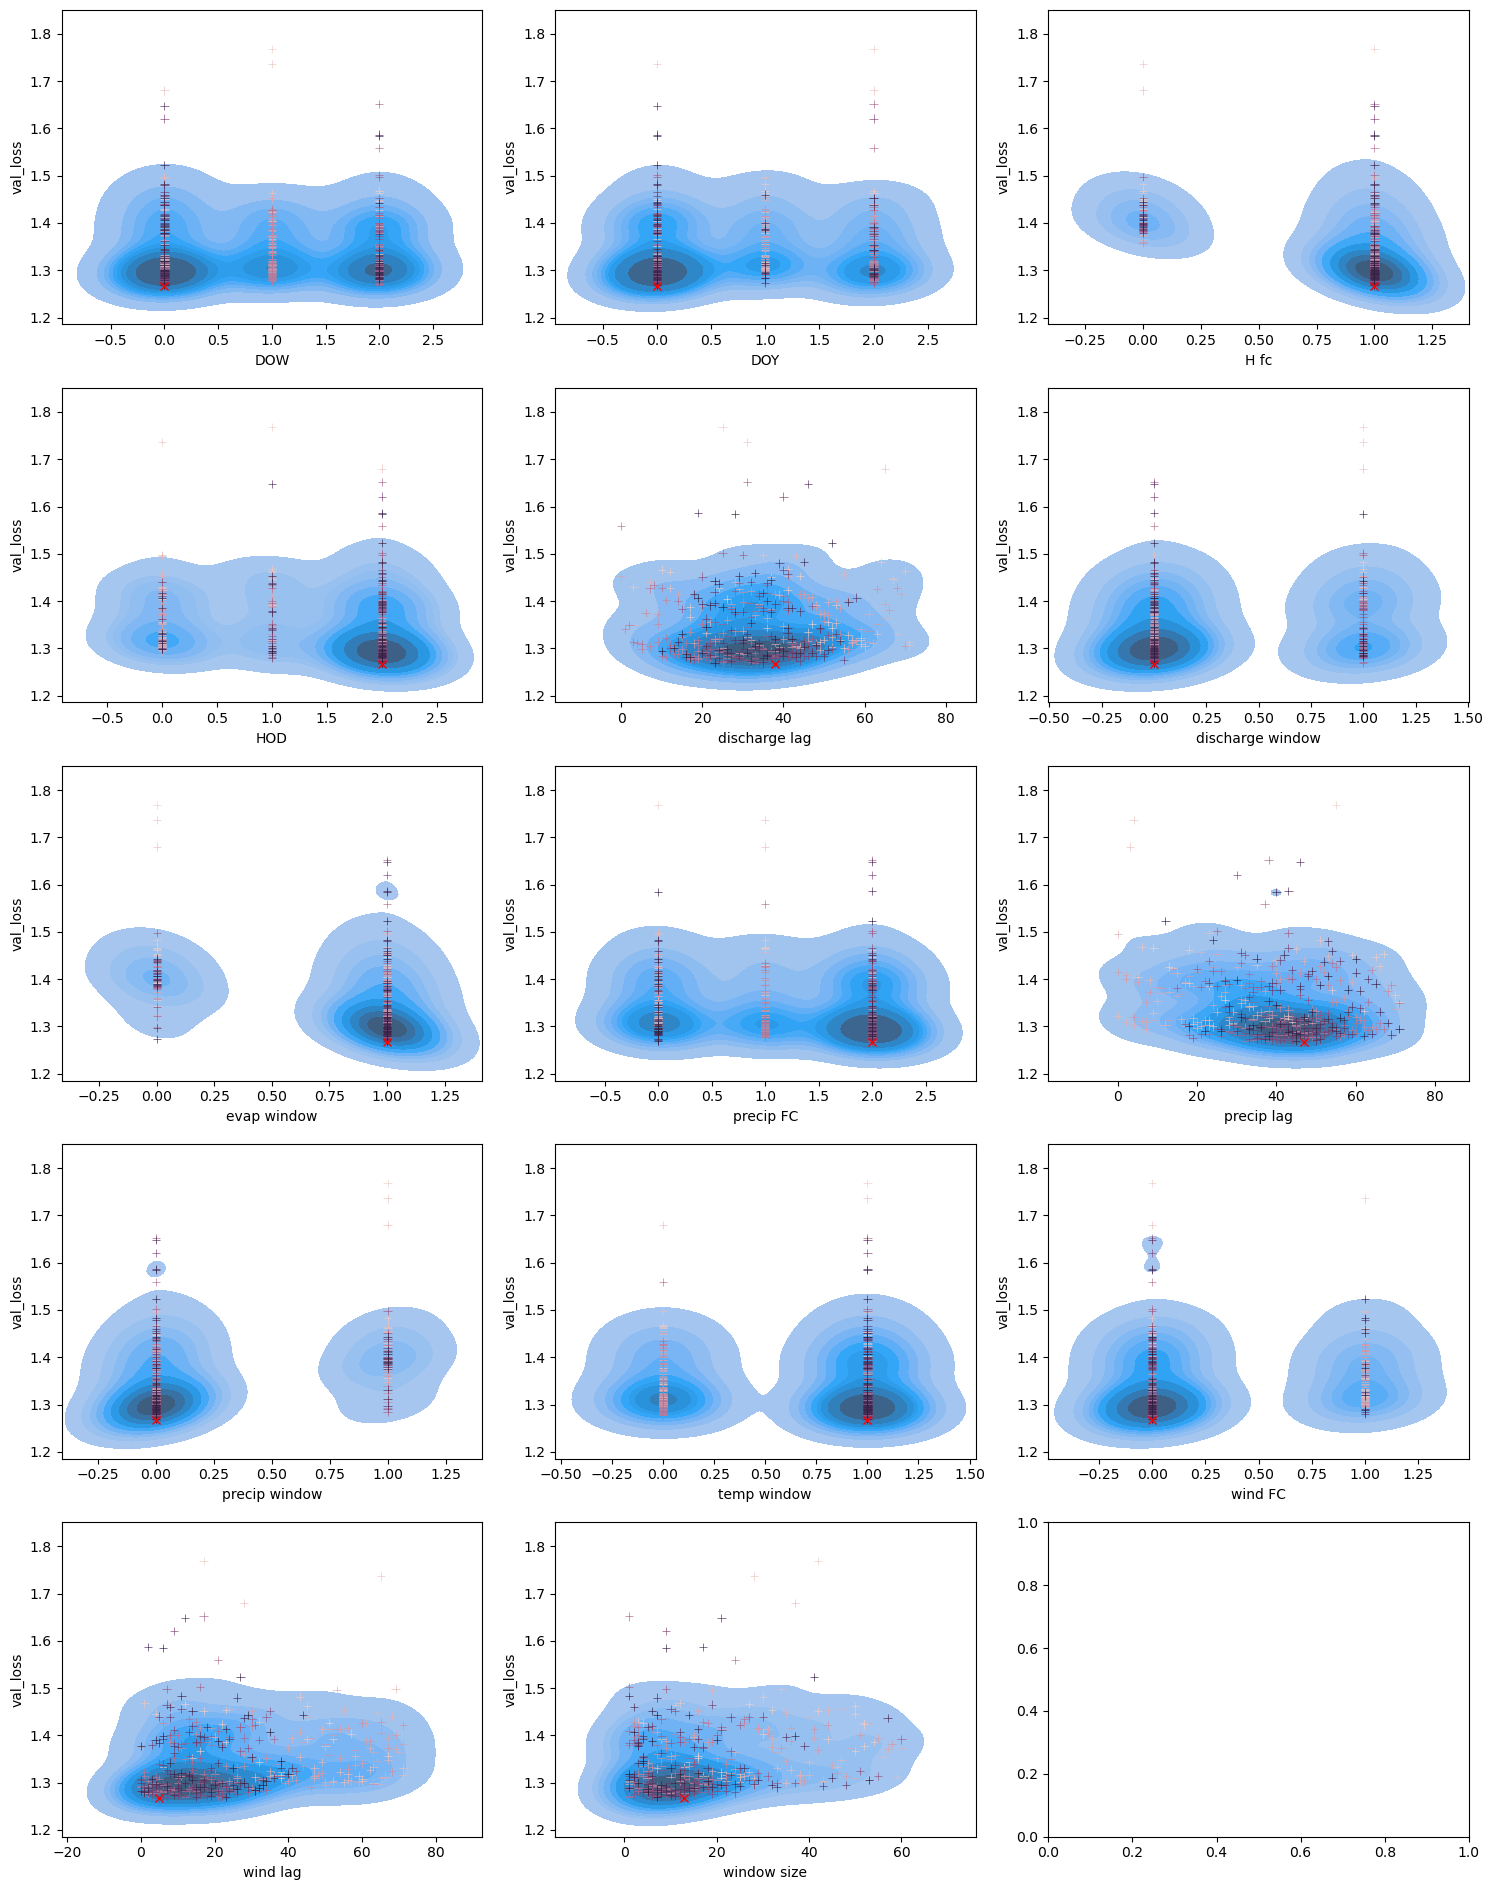

In [33]:
plot_feature_search('HHNK')

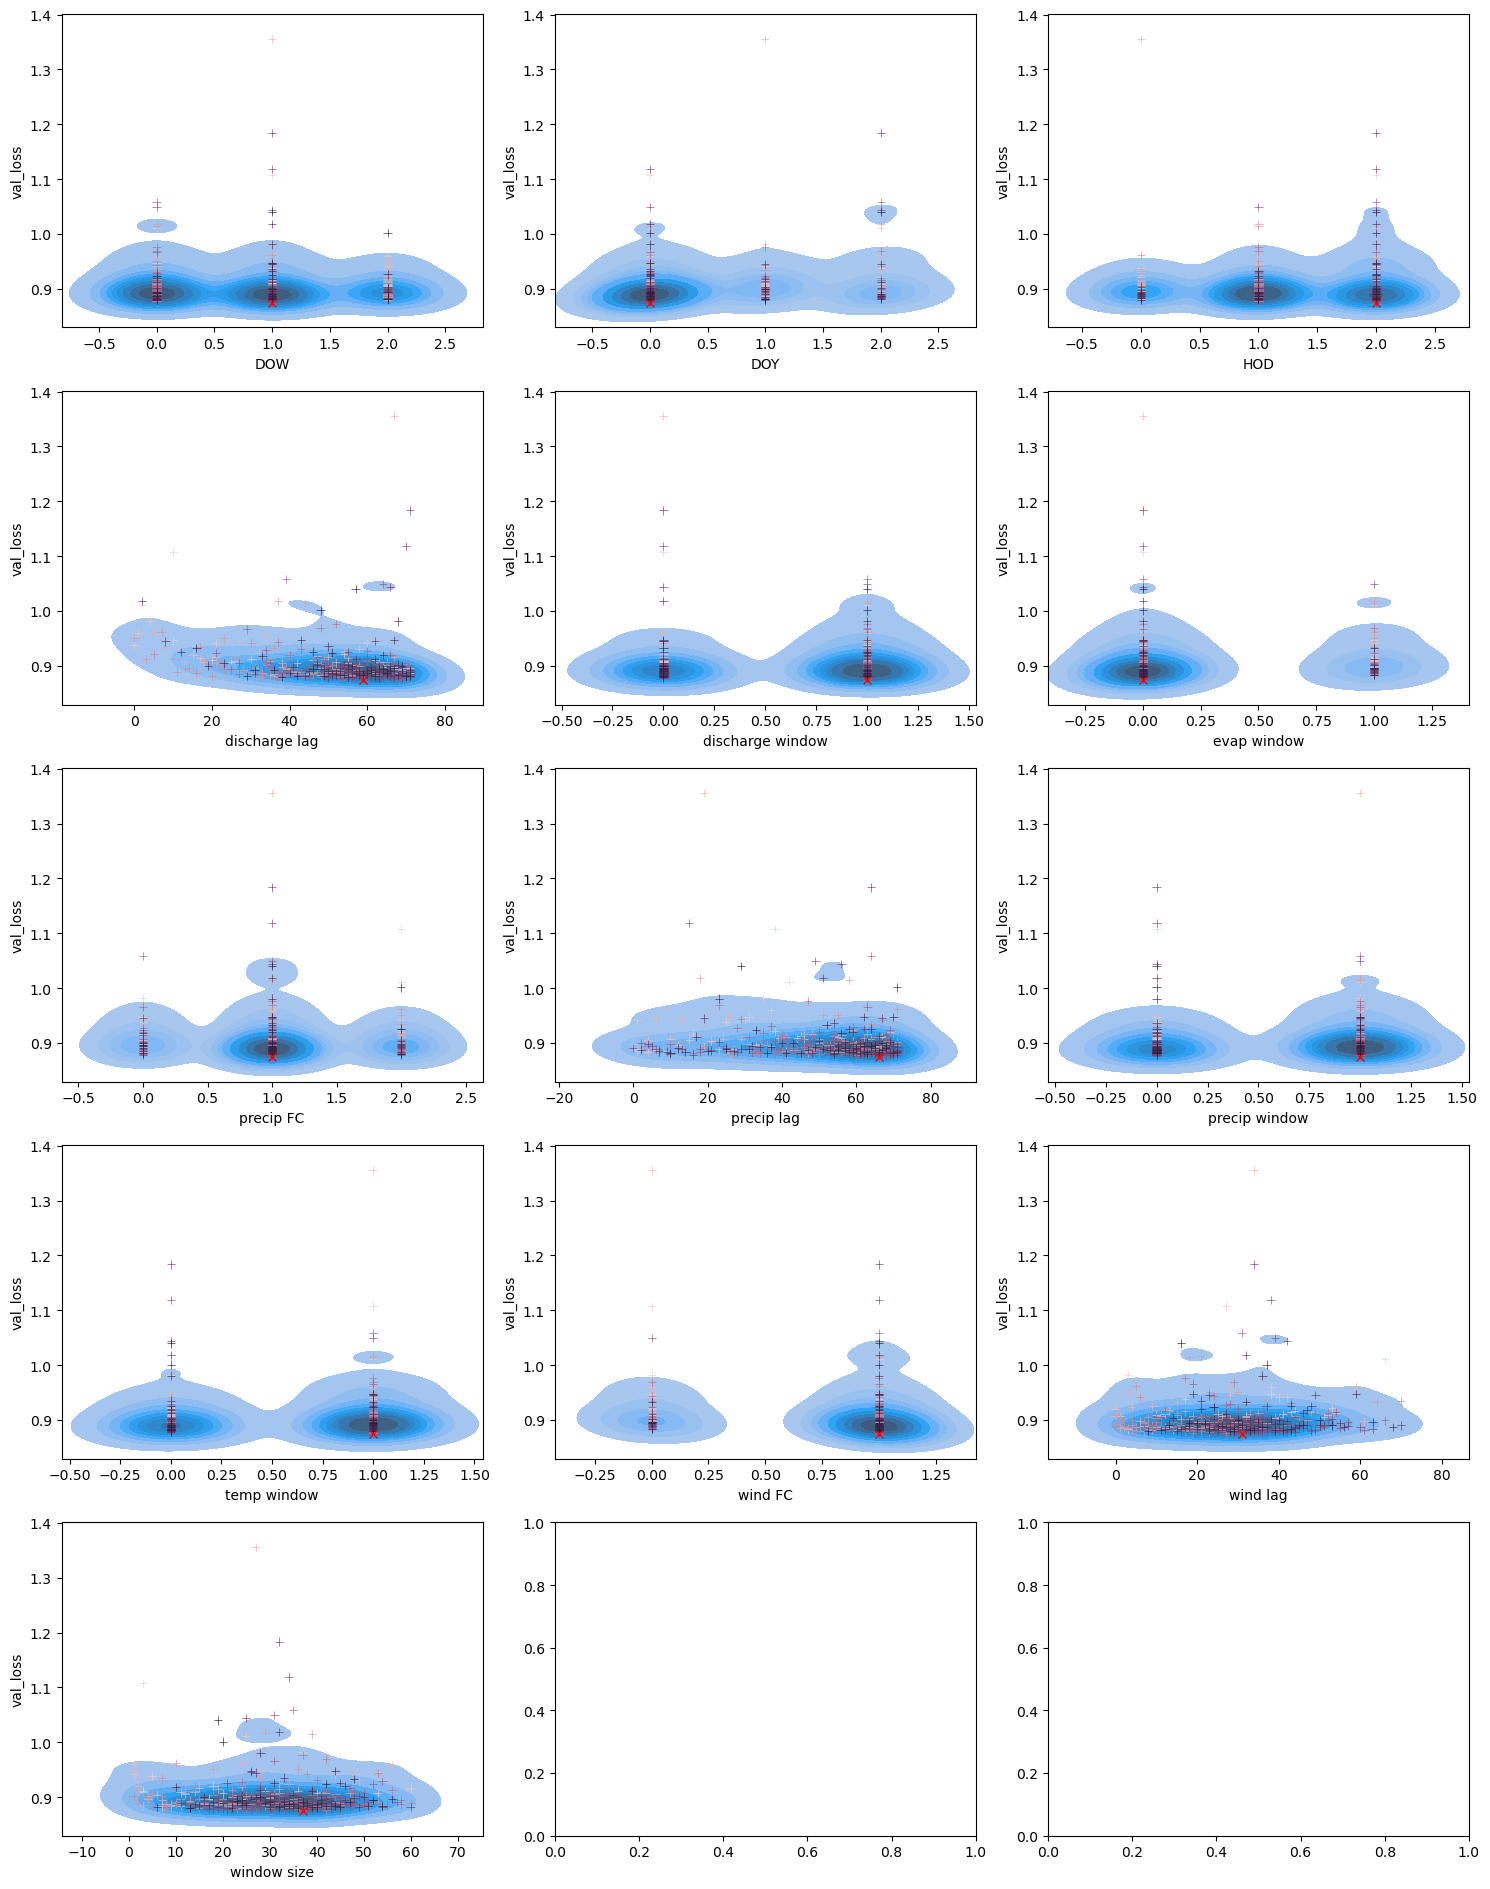

In [34]:
plot_feature_search('HDSR')

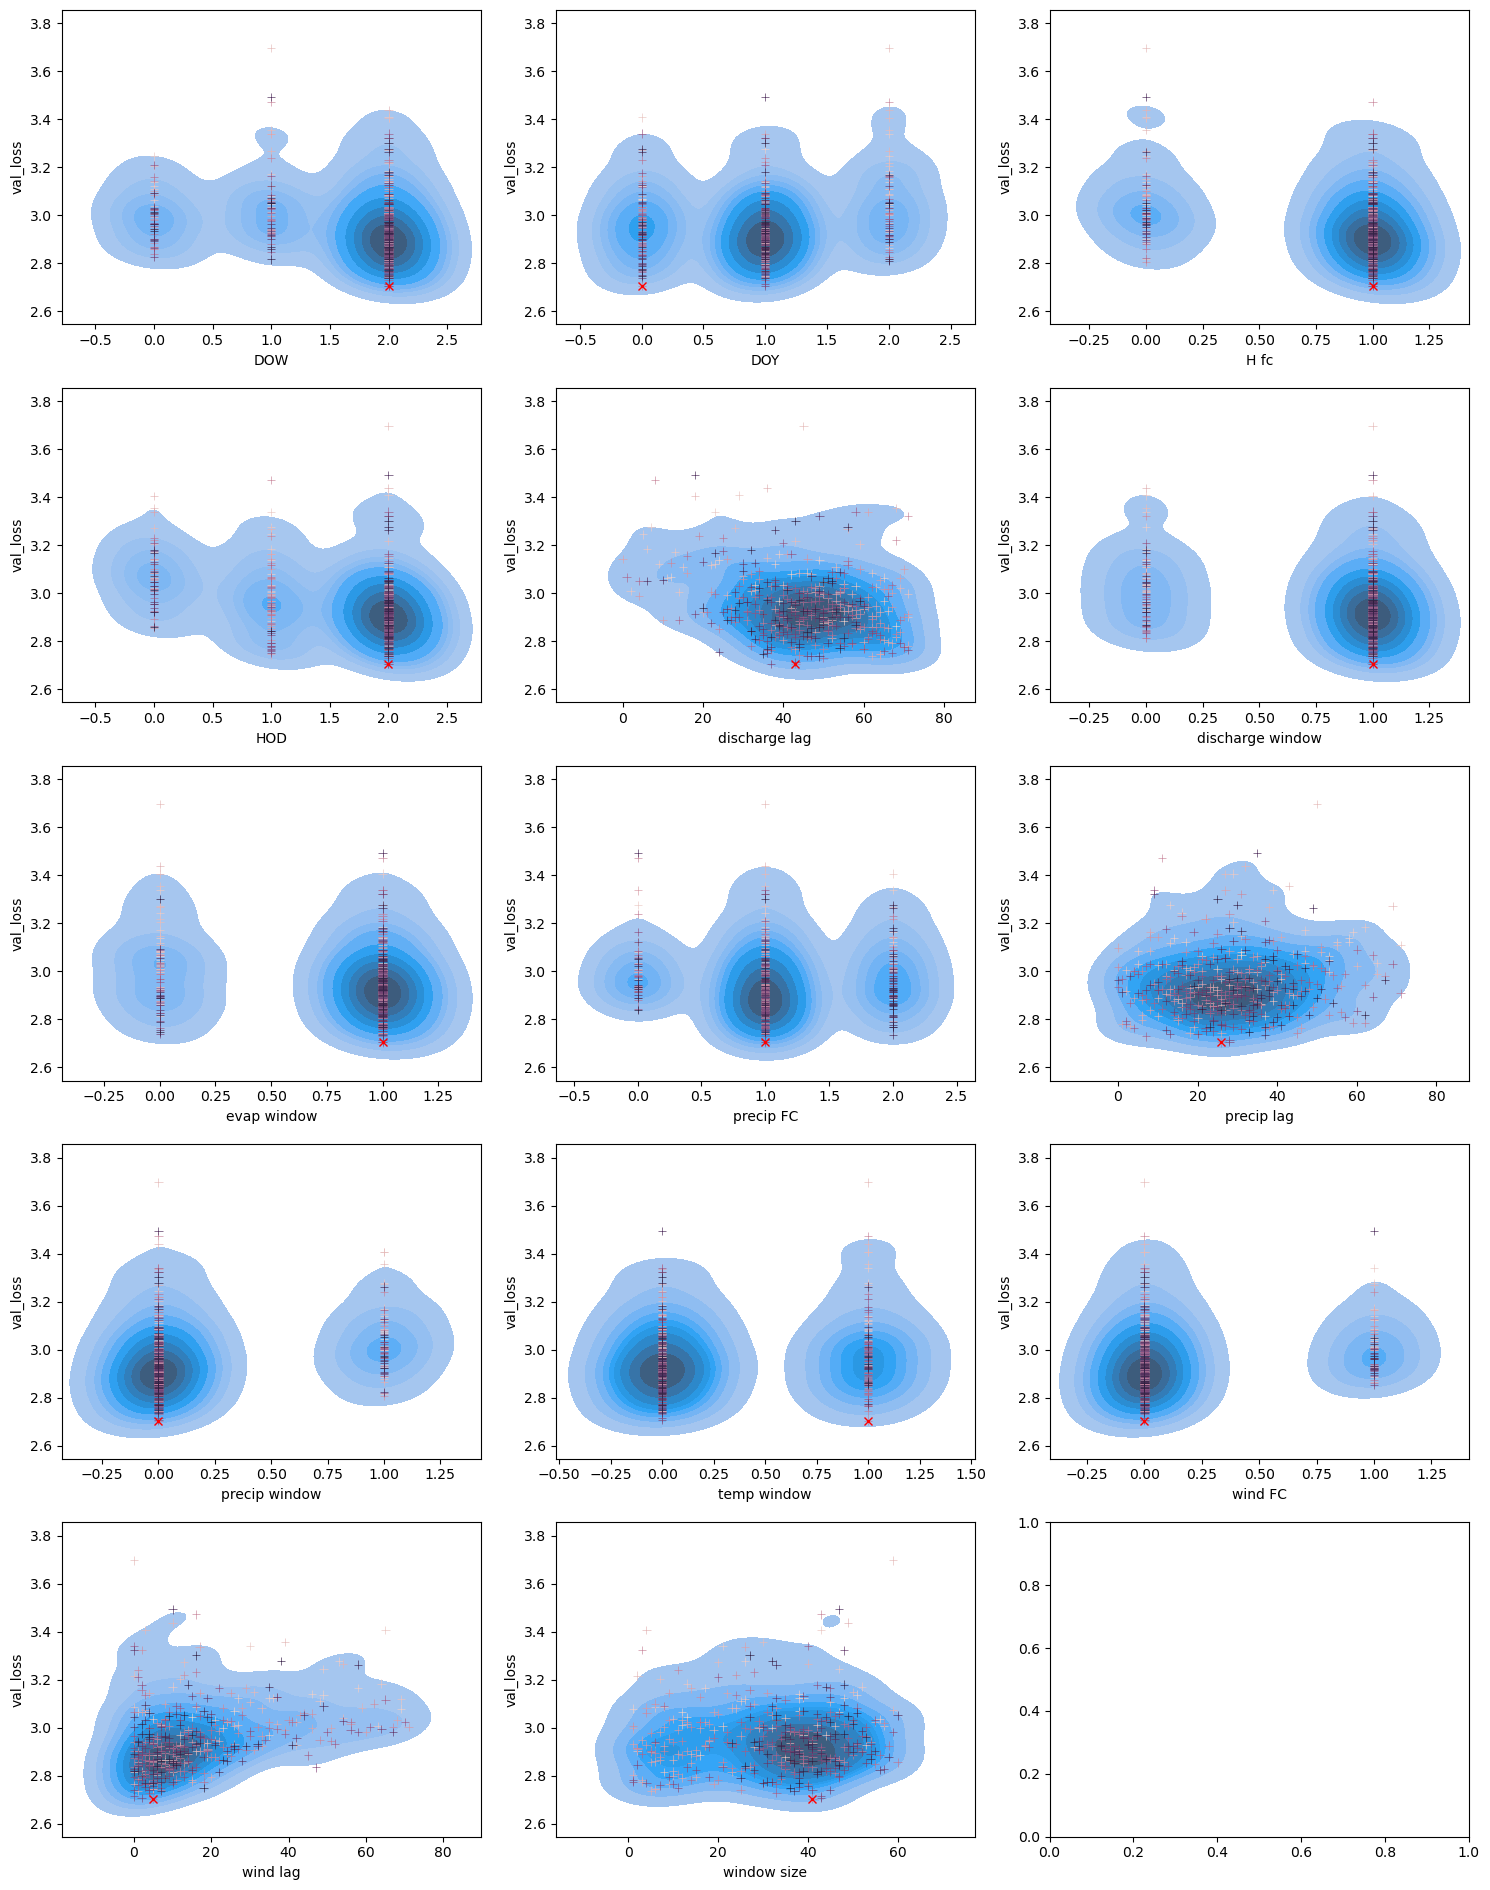

In [35]:
plot_feature_search('Rijnland')

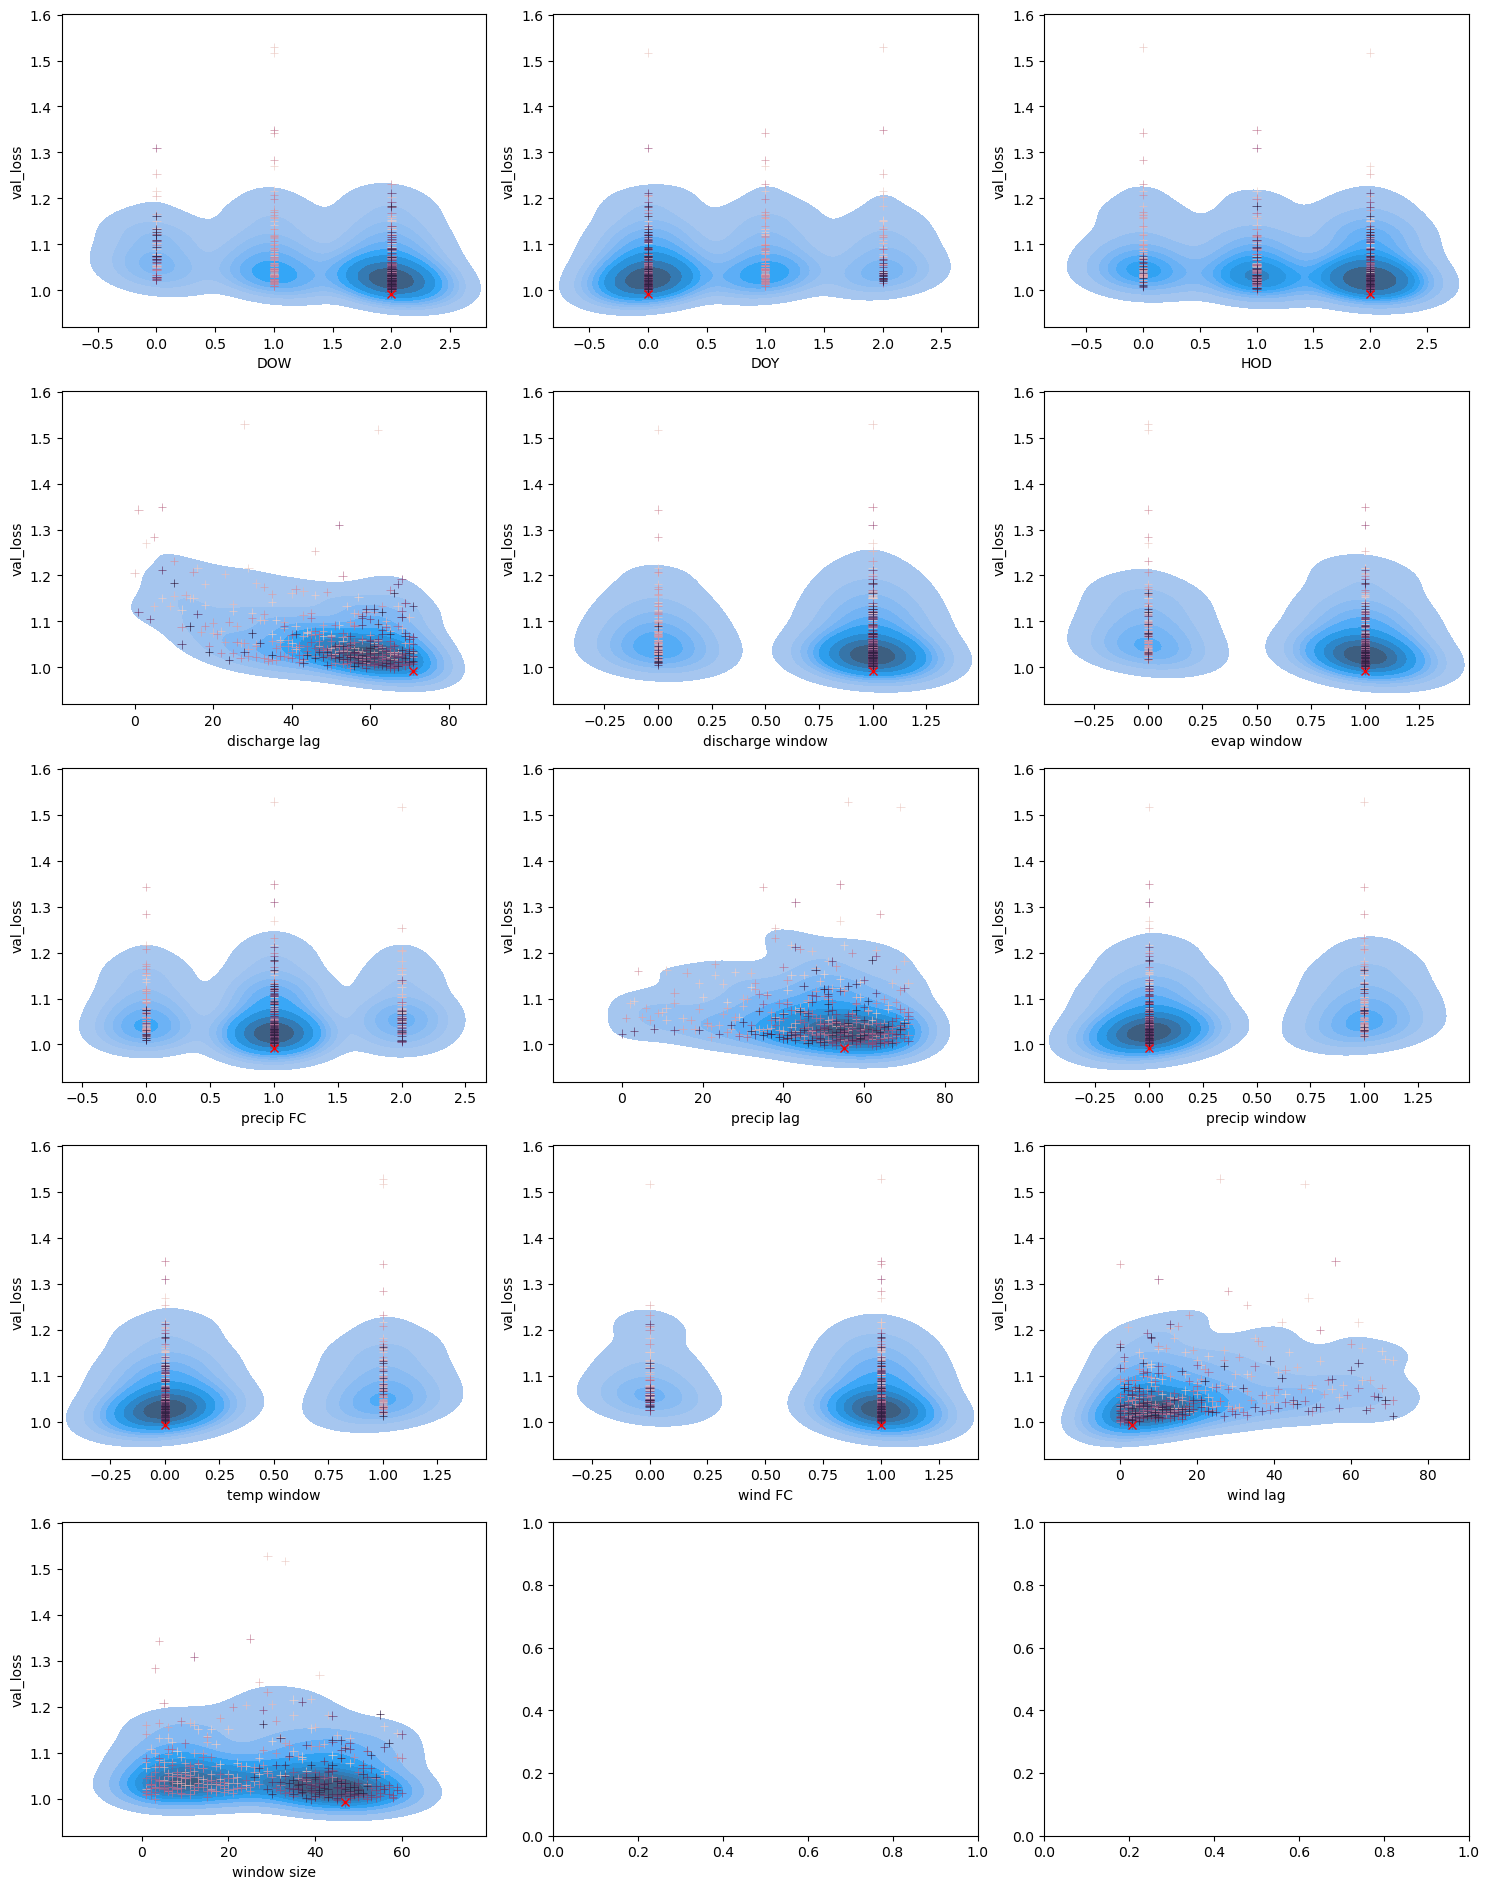

In [36]:
plot_feature_search('Waternet')

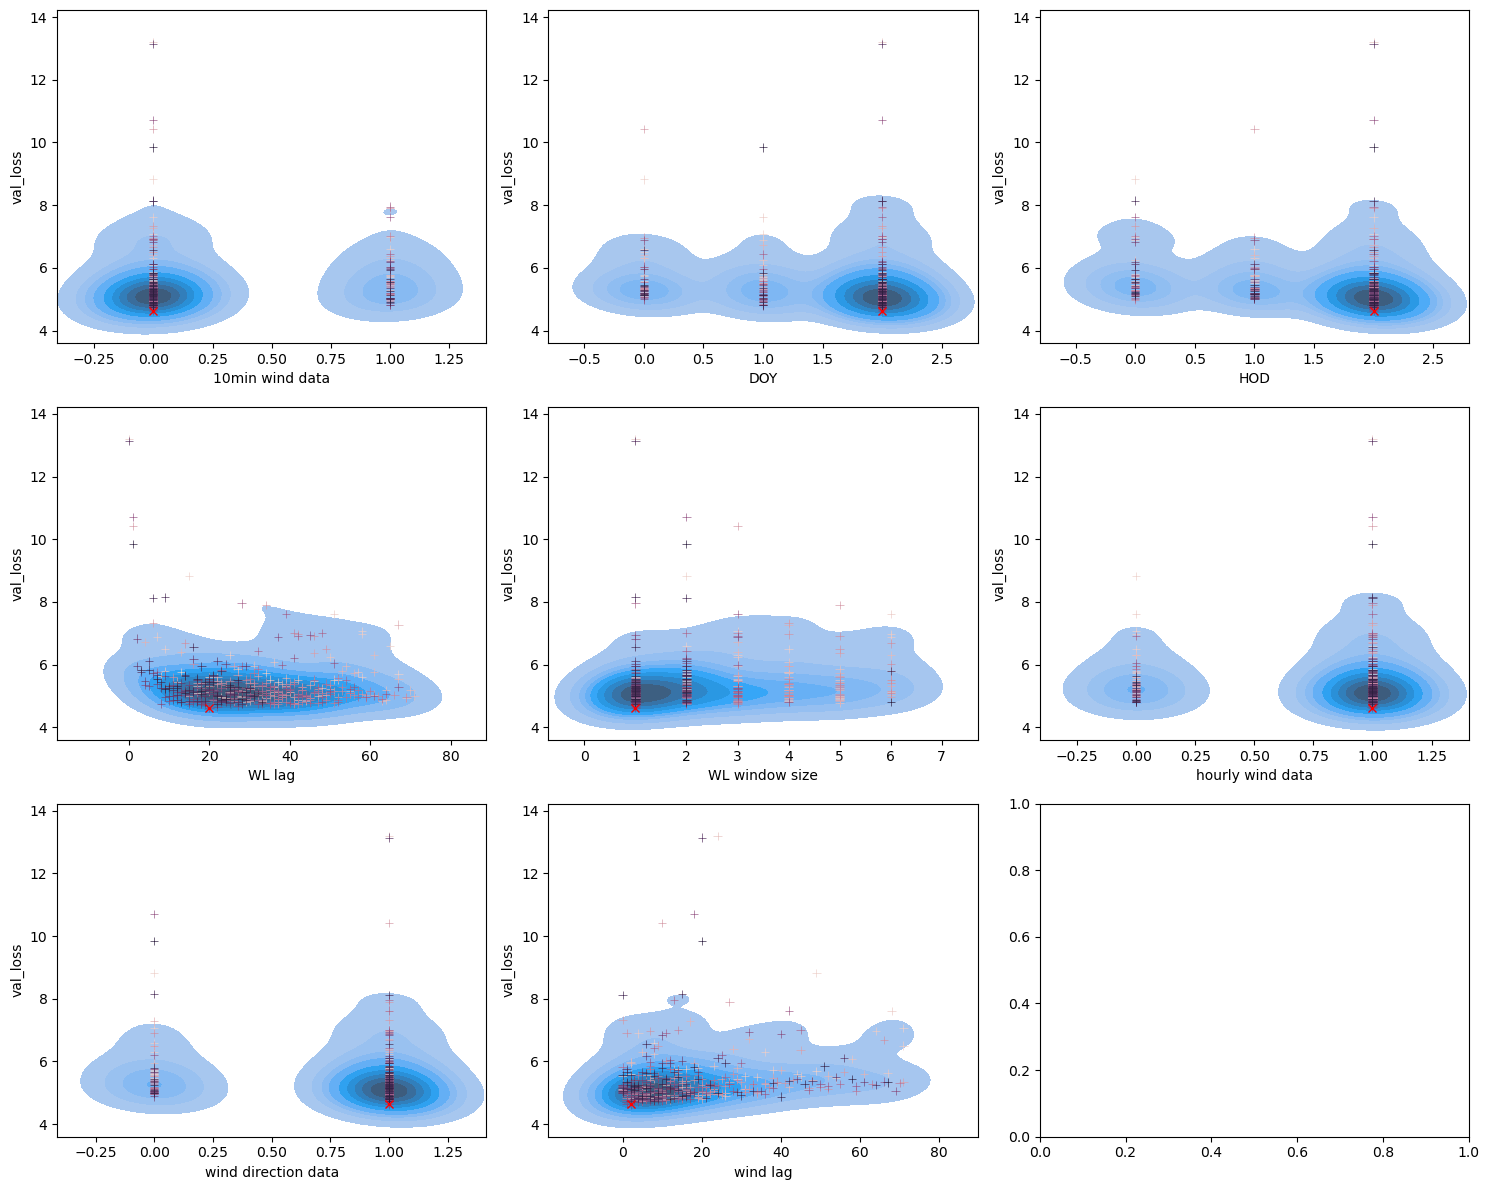

In [37]:
plot_feature_search('WL')